# Dissimilarity based on histogram analysis
Each voxet produces an histogram of values. The distance between two histograms is computed as the [Jensen-Shanon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), a symmetrized and smooth version of the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence).

Given two random variables $P$ and $Q$, the Jenson-Shanon divergence is conmputed as <br>
JSD$(P||Q)= {{1} \over {2}} $KLD$(P||M) + {{1} \over {2}} $KLD$(Q||M)$, where $M = {{P+Q} \over {2}} $ and KLD is the Kullback-Leibler divergence.

It requires $P$ and $Q$ to share the same support $\mathcal{X}$ and can be computed for continuous or discrete variables. Here, we assume that the support of our random variables is discrete and of size $n$ (possibly $n$ bins for discretized continuous variables).

Denoting the support of $P$ and $Q$ by $(x_i)_{i=1 \dots n}$, $p_i=\text{Prob}(P=x_i)$, $q_i=\text{Prob}(Q=x_i)$ and $m_i = {{p_i+q_i} \over {2}}$, the Jenson-Shanon divergence is computed as:

JSD$(P||Q) = {{1} \over {2}} \sum \limits _{i=1}^{n} p_i ln \left({{p_i}\over{m_i}} \right) + {{1} \over {2}} \sum \limits _{i=1}^{n} q_i ln \left({{q_i}\over{m_i}} \right)$

In [1]:
# import modules
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from loopUI import jsdist_hist #, plot_voxet

picklefilenamehistogram = "./pickledata/synthetic-case-histogram.pickle"
picklefilenamedata = "./pickledata/synthetic-case-data.pickle"

# plotting parameters
slice_ix=0
slice_iy=0
slice_iz=7
aspectratio = 1 # !! in pixels !!
sample_num1 = 9
sample_num2 = 2

# hist based dissimilarity parameters
myseed = 65432
nbins = 20
base = np.e


# import data
with open(picklefilenamedata, 'rb') as f:
    [lithocode_100,lithocode_50A,lithocode_50B,scalarfield_100,scalarfield_50A,
     scalarfield_50B,nx,ny,nz,nbsamples,clblab,clblabsf] = pickle.load(f)

## Histogram based distance illustration

08-Nov-2021 (13:09:07) - COMPUTING HISTOGRAM BASED DENSITY START


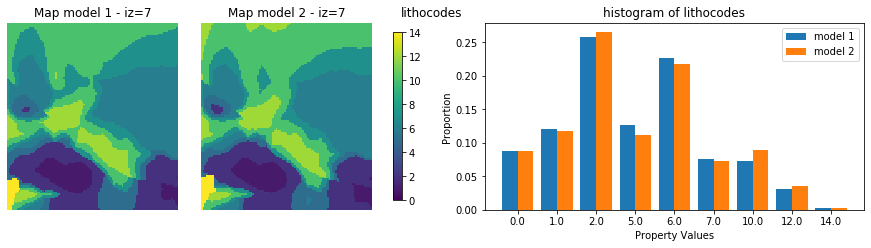

08-Nov-2021 (13:09:07) - COMPUTING HISTOGRAM BASED DENSITY END


In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DENSITY START")
img1 = lithocode_100[:,:,:,sample_num1] # for illustration, we consider the density field of random sample #9
img2 = lithocode_100[:,:,:,sample_num2] # for illustration, we consider the density field of random sample #2
dist_hist_lc = jsdist_hist(img1,img2,-1,base,plot=True,title="lithocodes",lab1="model 1",lab2="model 2",iz_section=7)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DENSITY END")

## Compute for all pairs of voxets

In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DIST ALL START")

lithocode_all = np.reshape(np.stack((lithocode_100,lithocode_50A,lithocode_50B),axis=4),(nz,ny,nx,nbsamples*3),order='F')
scalarfield_all = np.reshape(np.stack((scalarfield_100,scalarfield_50A,scalarfield_50B),axis=4),(nz,ny,nx,nbsamples*3),order='F')

# check index order 10 first _100, 10 next _50A, 10 last _50B
# for ixm in range(nbsamples*3):
#     plot_voxet(lithocode_all,ixm,'model '+str(ixm),0,0,7,1,cmap='viridis')


dist_hist_lc = np.zeros((nbsamples*3,nbsamples*3))
dist_hist_sf = np.zeros((nbsamples*3,nbsamples*3))

k=0
for i in range(nbsamples*3):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_hist_lc[i,j] = jsdist_hist(lithocode_all[:,:,:,i],lithocode_all[:,:,:,j],-1,base)
        dist_hist_sf[i,j] = jsdist_hist(scalarfield_all[:,:,:,i],scalarfield_all[:,:,:,j],nbins,base)
        dist_hist_lc[j,i] = dist_hist_lc[i,j]
        dist_hist_sf[j,i] = dist_hist_sf[i,j]
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DIST ALL END")


08-Nov-2021 (13:09:07) - COMPUTING HISTOGRAM BASED DIST ALL START
08-Nov-2021 (13:09:07) - k = 1 - i = 1 j =  0
08-Nov-2021 (13:09:07) - k = 2 - i = 2 j =  0
08-Nov-2021 (13:09:08) - k = 3 - i = 2 j =  1
08-Nov-2021 (13:09:08) - k = 4 - i = 3 j =  0
08-Nov-2021 (13:09:08) - k = 5 - i = 3 j =  1
08-Nov-2021 (13:09:08) - k = 6 - i = 3 j =  2
08-Nov-2021 (13:09:08) - k = 7 - i = 4 j =  0
08-Nov-2021 (13:09:08) - k = 8 - i = 4 j =  1
08-Nov-2021 (13:09:08) - k = 9 - i = 4 j =  2
08-Nov-2021 (13:09:08) - k = 10 - i = 4 j =  3
08-Nov-2021 (13:09:08) - k = 11 - i = 5 j =  0
08-Nov-2021 (13:09:08) - k = 12 - i = 5 j =  1
08-Nov-2021 (13:09:08) - k = 13 - i = 5 j =  2
08-Nov-2021 (13:09:09) - k = 14 - i = 5 j =  3
08-Nov-2021 (13:09:09) - k = 15 - i = 5 j =  4
08-Nov-2021 (13:09:09) - k = 16 - i = 6 j =  0
08-Nov-2021 (13:09:09) - k = 17 - i = 6 j =  1
08-Nov-2021 (13:09:09) - k = 18 - i = 6 j =  2
08-Nov-2021 (13:09:09) - k = 19 - i = 6 j =  3
08-Nov-2021 (13:09:09) - k = 20 - i = 6 j =  4
08-

08-Nov-2021 (13:09:25) - k = 171 - i = 18 j =  17
08-Nov-2021 (13:09:25) - k = 172 - i = 19 j =  0
08-Nov-2021 (13:09:26) - k = 173 - i = 19 j =  1
08-Nov-2021 (13:09:26) - k = 174 - i = 19 j =  2
08-Nov-2021 (13:09:26) - k = 175 - i = 19 j =  3
08-Nov-2021 (13:09:26) - k = 176 - i = 19 j =  4
08-Nov-2021 (13:09:26) - k = 177 - i = 19 j =  5
08-Nov-2021 (13:09:26) - k = 178 - i = 19 j =  6
08-Nov-2021 (13:09:26) - k = 179 - i = 19 j =  7
08-Nov-2021 (13:09:26) - k = 180 - i = 19 j =  8
08-Nov-2021 (13:09:27) - k = 181 - i = 19 j =  9
08-Nov-2021 (13:09:27) - k = 182 - i = 19 j =  10
08-Nov-2021 (13:09:27) - k = 183 - i = 19 j =  11
08-Nov-2021 (13:09:27) - k = 184 - i = 19 j =  12
08-Nov-2021 (13:09:27) - k = 185 - i = 19 j =  13
08-Nov-2021 (13:09:27) - k = 186 - i = 19 j =  14
08-Nov-2021 (13:09:27) - k = 187 - i = 19 j =  15
08-Nov-2021 (13:09:27) - k = 188 - i = 19 j =  16
08-Nov-2021 (13:09:27) - k = 189 - i = 19 j =  17
08-Nov-2021 (13:09:27) - k = 190 - i = 19 j =  18
08-Nov-202

08-Nov-2021 (13:09:46) - k = 337 - i = 26 j =  11
08-Nov-2021 (13:09:46) - k = 338 - i = 26 j =  12
08-Nov-2021 (13:09:47) - k = 339 - i = 26 j =  13
08-Nov-2021 (13:09:47) - k = 340 - i = 26 j =  14
08-Nov-2021 (13:09:47) - k = 341 - i = 26 j =  15
08-Nov-2021 (13:09:47) - k = 342 - i = 26 j =  16
08-Nov-2021 (13:09:47) - k = 343 - i = 26 j =  17
08-Nov-2021 (13:09:47) - k = 344 - i = 26 j =  18
08-Nov-2021 (13:09:47) - k = 345 - i = 26 j =  19
08-Nov-2021 (13:09:47) - k = 346 - i = 26 j =  20
08-Nov-2021 (13:09:47) - k = 347 - i = 26 j =  21
08-Nov-2021 (13:09:47) - k = 348 - i = 26 j =  22
08-Nov-2021 (13:09:48) - k = 349 - i = 26 j =  23
08-Nov-2021 (13:09:48) - k = 350 - i = 26 j =  24
08-Nov-2021 (13:09:48) - k = 351 - i = 26 j =  25
08-Nov-2021 (13:09:48) - k = 352 - i = 27 j =  0
08-Nov-2021 (13:09:48) - k = 353 - i = 27 j =  1
08-Nov-2021 (13:09:48) - k = 354 - i = 27 j =  2
08-Nov-2021 (13:09:48) - k = 355 - i = 27 j =  3
08-Nov-2021 (13:09:48) - k = 356 - i = 27 j =  4
08-No

## Multi-Dimensional Scaling representation

08-Nov-2021 (13:09:56) - COMPUTING 2D MDS REPRESENTATION START


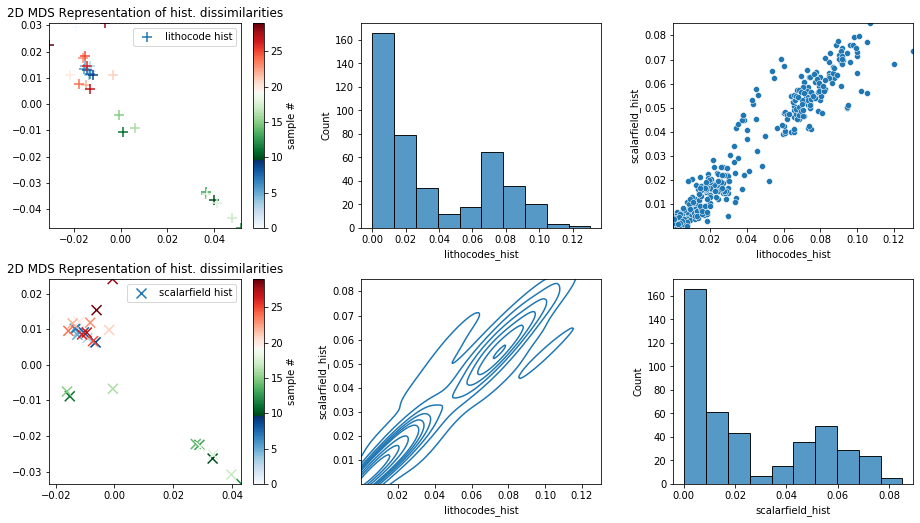

08-Nov-2021 (13:09:57) - COMPUTING 2D MDS REPRESENTATION END


In [4]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                   dissimilarity="precomputed", n_jobs=1)

mdspos_lc = mds.fit(dist_hist_lc).embedding_
mdspos_sf = mds.fit(dist_hist_sf).embedding_

s_id = np.arange(nbsamples*3)
# Plot concentric circle dataset
colors1 = plt.cm.Blues(np.linspace(0., 1, 512))
colors2 = np.flipud(plt.cm.Greens(np.linspace(0, 1, 512)))
colors3 = plt.cm.Reds(np.linspace(0, 1, 512))
colors = np.vstack((colors1, colors2, colors3))
mycmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

ix=np.tril_indices(nbsamples*3,k=-1)
df= pd.DataFrame({'lithocodes_hist':dist_hist_lc[ix], 'scalarfield_hist':dist_hist_sf[ix]})

lcmin = np.amin(dist_hist_lc[ix]) 
lcmax = np.amax(dist_hist_lc[ix])
sfmin = np.amin(dist_hist_sf[ix]) 
sfmax = np.amax(dist_hist_sf[ix])

lcMDSxmin = np.min(mdspos_lc[:,0])
lcMDSxmax = np.max(mdspos_lc[:,0])
lcMDSymin = np.min(mdspos_lc[:,1])
lcMDSymax = np.max(mdspos_lc[:,1])

sfMDSxmin = np.min(mdspos_sf[:,0])
sfMDSxmax = np.max(mdspos_sf[:,0])
sfMDSymin = np.min(mdspos_sf[:,1])
sfMDSymax = np.max(mdspos_sf[:,1])

s = 100
fig = plt.figure()
plt.subplot(231)
plt.title('2D MDS Representation of hist. dissimilarities')
plt.scatter(mdspos_lc[:, 0], mdspos_lc[:, 1], c=s_id,cmap=mycmap, s=s, label='lithocode hist', marker='+')
plt.xlim(lcMDSxmin,lcMDSxmax)
plt.ylim(lcMDSymin,lcMDSymax)
plt.legend(scatterpoints=1, loc='best', shadow=False)
cbar = plt.colorbar()
cbar.set_label('sample #')
plt.subplot(234)
plt.title('2D MDS Representation of hist. dissimilarities')
plt.scatter(mdspos_sf[:, 0], mdspos_sf[:, 1], c=np.arange(nbsamples*3),cmap=mycmap, s=s, label='scalarfield hist', marker='x')
plt.xlim(sfMDSxmin,sfMDSxmax)
plt.ylim(sfMDSymin,sfMDSymax)
plt.legend(scatterpoints=1, loc='best', shadow=False)
cbar = plt.colorbar()
cbar.set_label('sample #')
plt.subplot(232)
sns.histplot(df.lithocodes_hist)
plt.subplot(233)
sns.scatterplot(x=df.lithocodes_hist,y=df.scalarfield_hist)
plt.xlim(lcmin,lcmax)
plt.ylim(sfmin,sfmax)
plt.subplot(235)
sns.kdeplot(x=df.lithocodes_hist,y=df.scalarfield_hist)
plt.xlim(lcmin,lcmax)
plt.ylim(sfmin,sfmax)
plt.subplot(236)
sns.histplot(df.scalarfield_hist)
fig.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.6, wspace=0.3, hspace=0.25)
plt.show()

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")

## Save indicators

In [5]:
with open(picklefilenamehistogram, 'wb') as f:
    pickle.dump([dist_hist_lc,dist_hist_sf], f)